# 具有一个隐藏层的平面数据分类
## 1. 包含package
+ numpy 是Python科学计算的基础包
+ sklearn 为数据挖掘和分析提供了简单有效的工具
+ matplotlib 是一个python绘制图像的库
+ testCases 提供了一些测试样例来确保函数的正确性
+ planar_utils 提供了各种有用的函数

In [108]:
#包含package
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_extra_datasets, load_planar_dataset
np.random.seed(1)

In [109]:
# 使matplotlib能够显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2. 数据集

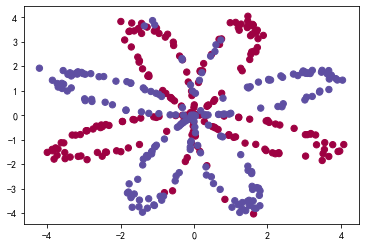

In [110]:
# 导入数据
X, Y = load_planar_dataset()
# 可视化数据
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)

**Exercise**: How many training examples do you have? In addition, what is the shape of the variables X and Y?
**Hint**: How do you get the shape of a numpy array? (help)

In [111]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  #训练集数量

print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## 3. 简单Logisitc回归

In [112]:
# 训练Logistic回归分类器
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic 回归')

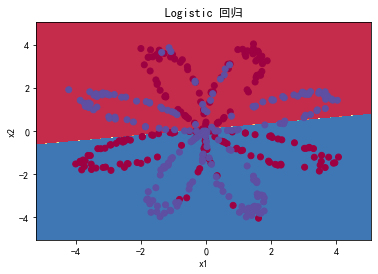

In [113]:
# 绘制Logistic回归的决策边界
plot_decision_boundary(lambda x:clf.predict(x),X,Y)
plt.title("Logistic 回归")

In [114]:
# 输出精度
LR_predictions = clf.predict(X.T)
print('Logistic回归的精度是：%d' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100) + '%' + "(正确标记的数据点所占百分比)")

Logistic回归的精度是：47%(正确标记的数据点所占百分比)


## 4. 神经网络模型
### 4.1 定义神经网络结构 

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [115]:
# 函数：layer_sizes

def layer_sizes(X,Y):
    """
    参数：
    X -- 输入数据集的形状（输入尺寸，数据个数）
    Y -- 标签的形状（输出尺寸，数据个数）

    返回：
    n_x -- 输入层的尺寸
    n_h -- 隐藏层的尺寸
    n_y -- 输出层的尺寸
    """
    n_x= X.shape[0]
    n_h= 4
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [116]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 4.2 初始化模型参数

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [117]:
# 函数：initialize_parameters

def initialize_parameters(n_x,n_h,n_y):
    """
    参数：
    n_x -- 输入层的尺寸
    n_h -- 隐藏层的尺寸
    n_y -- 输出层的尺寸

    返回：
    参数 -- 包含以下参数的 python 词典：
                W1 -- 维度为(n_h,n_x)的权重矩阵
                b1 -- 维度为(n_h,1)的偏置向量
                W2 -- 维度为(n_y,n_h)的权重矩阵
                b2 -- 维度为(n_y,1)的偏置向量
    """
    np.random.seed(2) # 设定固定随机数种子以核对答案

    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters


In [118]:
n_x,n_h,n_y=initialize_parameters_test_case()

parameters=initialize_parameters(n_x,n_h,n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 4.3 循环

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [119]:
# 函数： forward_propagation

def forward_propagation(X,parameters):
    """
    参数：
    X -- 输入数据的尺寸(n_x,m)
    参数 -- initialization函数输出的参数

    返回：
    A2 -- 第二个激活函数sigoid的输出
    cache -- 一个包含 Z1,A1,Z2,A2 的字典
    """
    # 从"parameters"中取回参数
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    # 部署向前传播以计算 A2 (可能性)
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    assert(A2.shape==(1,X.shape[1]))

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2,cache

In [120]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [121]:
# 函数：计算代价

def compute_cost(A2,Y,parameters):
    """
    参数：
    A2 -- sigmoid的输出，维度为(1,样本个数)
    Y -- "真"标签向量(1,样本个数)
    parameters -- 包含W1, b1, W2 和 b2的python词典

    返回：
    cost
    """
    m=Y.shape[1]

    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost=-1/m*np.sum(logprobs)

    cost=float(np.squeeze(cost)) # 使cost的维度为我们所期待的，如，让[[17]]变为17
    assert(isinstance(cost,float))
    return cost


In [122]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [123]:
# 函数：backward_propagation

def backward_propagation(parameters,cache,X,Y):
    """
    参数：
    parameters -- 包含我们参数的python词典
    cache -- 包含"Z1", "A1", "Z2" 和 "A2"的词典
    X -- 输入维度为(2,样例个数)的数据
    Y -- 维度为(1,样例个数)的"真"标签向量

    返回：
    梯度 -- 包含关于不同参数的包含梯度的词典
    """
    m=X.shape[1]

    ## 首先，从"parameters"取回参数W1,W2
    W1=parameters["W1"]
    W2=parameters["W2"]
    ## 然后，从"cache"取回参数A1,A2
    A1=cache["A1"]
    A2=cache["A2"]

    ## 计算dW1,db1,dW2,db2
    dZ2=A2-Y
    dW2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [124]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [125]:
# 函数：update_parameters
def update_parameters(parameters,grads,learning_rate=1.2):
    """
    返回：
    parameters -- 更新的参数
    """

    # 取回参数
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # 更新参数
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters

In [126]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [127]:
# 函数：nn_model

def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    """
    返回：
    parameters -- 模型学习得到的参数
    """

    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]

    # 初始化参数
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    # 循环（梯度下降）
    for i in range(0,num_iterations):
        # 向前传播
        A2,cache = forward_propagation(X,parameters)
        # 计算代价
        cost=compute_cost(A2,Y,parameters)
        # 反向传播
        grads = backward_propagation(parameters,cache,X,Y)
        # 梯度下降参数更新
        parameters=update_parameters(parameters,grads)
        if print_cost and i%1000==0:
            print("Cost after iteration %i:%f"%(i,cost))
    return parameters

In [128]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0:0.692739
Cost after iteration 1000:0.000218
Cost after iteration 2000:0.000107
Cost after iteration 3000:0.000071
Cost after iteration 4000:0.000053
Cost after iteration 5000:0.000042
Cost after iteration 6000:0.000035
Cost after iteration 7000:0.000030
Cost after iteration 8000:0.000026
Cost after iteration 9000:0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [129]:
# 函数：predict
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions= A2>0.5
    return predictions

In [130]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

Cost after iteration 0:0.693048
Cost after iteration 1000:0.288083
Cost after iteration 2000:0.254385
Cost after iteration 3000:0.233864
Cost after iteration 4000:0.226792
Cost after iteration 5000:0.222644
Cost after iteration 6000:0.219731
Cost after iteration 7000:0.217504
Cost after iteration 8000:0.219426
Cost after iteration 9000:0.218550


Text(0.5, 1.0, '尺寸为4的决策边界')

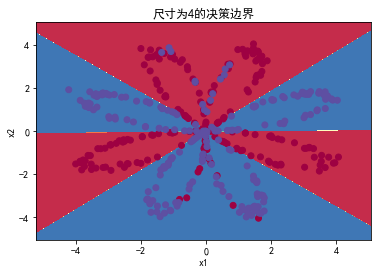

In [131]:
# 建立一个拥有n_h维隐藏层的模型
parameters=nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)

# 画出决策边界
plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
plt.title("尺寸为"+str(4)+"的决策边界")

In [132]:
# 打印精度
predictions = predict(parameters, X)
print ('精确度: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

精确度: 90%


### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

In [ ]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))